In [1]:
import os
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt

# Define path to CSVs
DATA_PATH = "C:/Users/LENOVO/.cache/kagglehub/datasets/protobioengineering/mit-bih-arrhythmia-database-modern-2023/versions/2"

# Helper functions
def bandpass_filter(signal, fs=360, lowcut=0.5, highcut=40, order=2):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

def normalize_signal(signal):
    return (signal - np.mean(signal)) / np.std(signal)

# Your main function
def load_preprocess_csv(record_id, fs=360):
    filepath = os.path.join(DATA_PATH, f"{record_id}.csv")
    df = pd.read_csv(filepath, header=None, dtype=str)
    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(axis=1, how='all', inplace=True)
    df.dropna(axis=0, how='any', inplace=True)
    signal = df.iloc[:, 0].values
    filtered = bandpass_filter(signal, fs=fs)
    normalized = normalize_signal(filtered)
    return normalized

In [2]:
def create_windows(signal, window_size=256, stride=128):
    windows = []
    for i in range(0, len(signal) - window_size + 1, stride):
        window = signal[i:i + window_size]
        windows.append(window)
    return np.array(windows)

In [3]:
def load_preprocess_csv(record_id, fs=360):
    filepath = os.path.join(DATA_PATH, f"{record_id}.csv")
    
    # Read and force numeric values only
    df = pd.read_csv(filepath, header=None, dtype=str)  # Read as string first
    df = df.apply(pd.to_numeric, errors='coerce')       # Convert to numeric, set invalid to NaN
    
    # Drop rows/columns that are entirely NaN
    df.dropna(axis=1, how='all', inplace=True)
    df.dropna(axis=0, how='any', inplace=True)  # Remove rows with NaN (optional, based on data quality)

    # Use first available column as ECG signal
    signal = df.iloc[:, 0].values

    # Preprocess
    filtered = bandpass_filter(signal, fs=fs)
    normalized = normalize_signal(filtered)

    return normalized

In [5]:
import os
import numpy as np

base_path = "C:/Users/LENOVO/.cache/kagglehub/datasets/protobioengineering/mit-bih-arrhythmia-database-modern-2023/versions/2"

record_ids = ["100", "101", "102", "103", "104"]  # Add more

all_windows = []

for record in record_ids:
    file_path = os.path.join(base_path, f"{record}.csv")
    ecg = load_preprocess_csv(record, fs=360)
    windows = create_windows(ecg, window_size=256, stride=128)
    all_windows.append(windows)

dataset = np.vstack(all_windows)
print("Final dataset shape:", dataset.shape)

Final dataset shape: (25385, 256)


In [6]:
np.save("ecg_windows_256.npy", dataset)

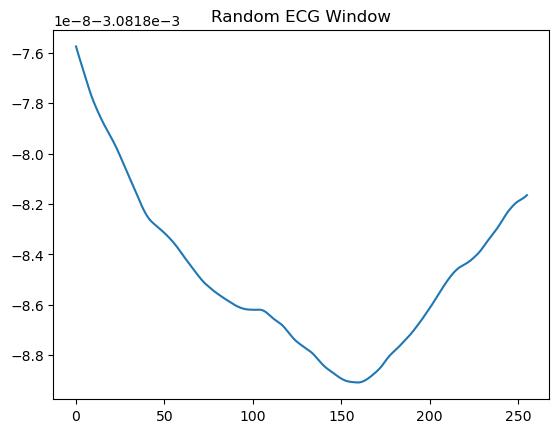

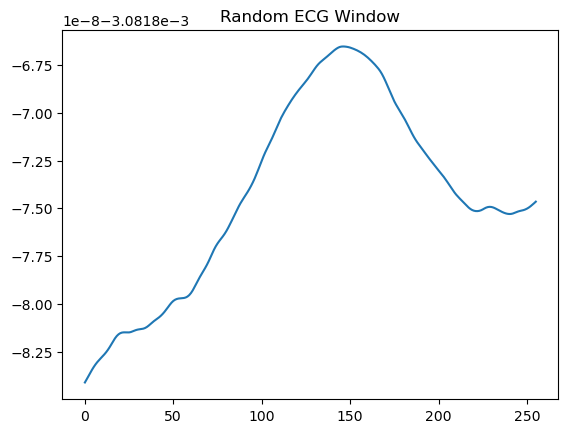

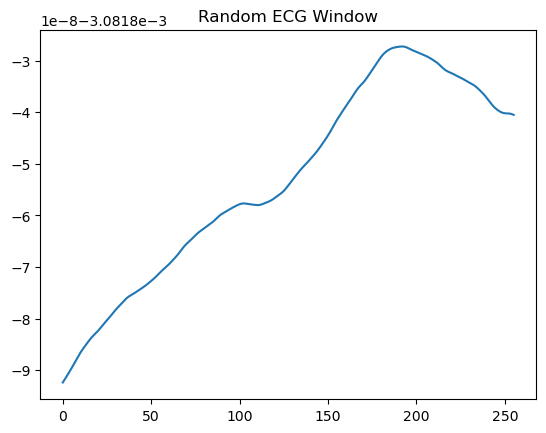

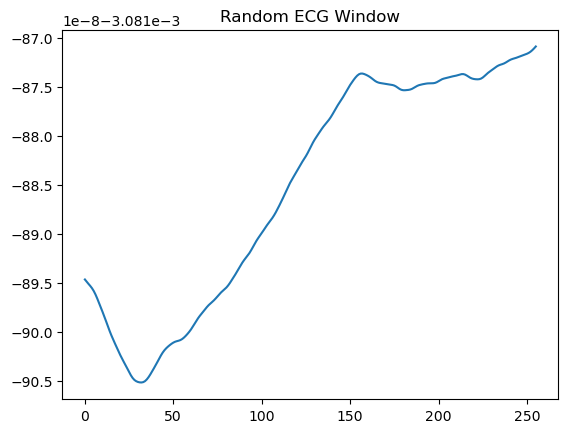

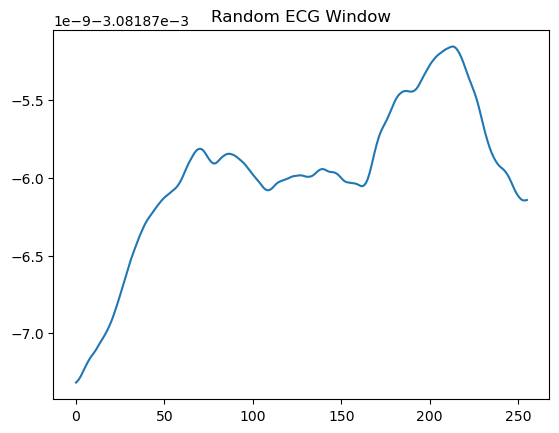

In [7]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.plot(dataset[np.random.randint(len(dataset))])
    plt.title("Random ECG Window")
    plt.show()